## Module 4: *(Template)*

**RENAME THE FILE TO INCLUDE YOUR COMPANY, GROUP NUMBER, AND LAST NAMES**

**E.G. Elmqivst_Lee_ _MODULE4 
KAMEN1_GROVES_MODULE_4.IPYNB**

## Team Members:
Luke Shee, Christy Lee (Group 5)

## Project Title:
Utilizing differential equations to analyze the number of COVID cases in China 



## Project Goal:
The goal of the project is to model COVID in China utilizing an SIR model

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    * Incidence: 
        * Across the world, around 22 thousand COVID-19 cases were reported (though not confirmed) to the World Health Organization (WHO) over the past week, not including data from the U.S. or China. Cumulatively, there has been 778.9 million COVID-19 cases reported to the WHO globally as of November 11, 2025.
            * Source: https://data.who.int/dashboards/covid19/cases
        * Up to April 13, 2024, China had a total of around 503 thousand COVID-19 cases.
            * Source: https://www.worldometers.info/coronavirus/country/china/
    * Prevalence: 
        * On April 13, 2024, China had approximately 119 thousand active COVID-19 cases 
            * Source: https://www.worldometers.info/coronavirus/country/china/

* Economic burden
    * There is an estimated cost of $671.4 per patient 
    * some studies reveal that direct medical costs ranged from $1264-$79315 
    * the total ecnomic burden of COVID was estimated to be between $77 billion-2.7 trillion in 2019
    * the quarantine costs of COVID exceeded 9% of the global GDP
        * Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC10870589/

* Risk factors (genetic, lifestyle) & Societal determinants
    * people ages 65 and older and babies younger than 6 months have a higher risk of serious COVID infection and likelihood of requiring hospital care
    * babies younger than 6 months aren't eligible for the COVID vaccine, increasing their risk
    * People with heart disease, diabetes, chronic lung diseases, obseity, and chronic kidney diseases are more likely to have severe cases of COVID
    * The risk of having COVID is higher for people with lung diseases such as COPD and Asthma
    * Having the COVID vaccine will lower risks of severe COVID
    * regularly washing hands throughout the day, wearing a mask, avoiding close contact with anyone that is sick or is showing symptoms will lower risk of getting COVID
        * Source: https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/coronavirus-who-is-at-risk/art-20483301 

* Symptoms
    * fever or chills 
    * cough
    * shortness of breath or difficulty breathing
    * sore throat
    * congestion or runny nose
    * loss of taste or smell
    * fatigue
    * muscle or body aches
    * headache
    * nausea or vomiting
    * diarrhea
        * Source: https://www.cdc.gov/covid/signs-symptoms/index.html 

* Diagnosis
    * There are 2 main types of tests to help diagnose COVID 
        * molecular tests: look for genetic material from the COVID virus.
            * polymerase chain reaction tests are molecular tests. PCR tests are more accurate than an antigen test
            * molecular tests can be done at home
        * Antigen tests: look for viral proteins called antigens
            * this is typically a rapid COVID test or an at-home COVID test
        * Source: https://www.mayoclinic.org/diseases-conditions/coronavirus/diagnosis-treatment/drc-20479976 

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * SARS-CoV-2 entry into the cell involces the binding of the spike protein on the surface of COVID onto a receptor on the outer membrane of the cell,  angiotensin-converting enzyme 2 (ACE2), causing membrane fusion
        * Source: https://www.nature.com/articles/s41580-021-00418-x
    

## Dataset: 

* The data listing confirmed COVID-19 cases per day in several countries from 2020 to 2023 was retrieved from the following GitHub page: https://github.com/CSSEGISandData/COVID-19
    * The data was gathered and managed by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE), along with the assistance of the John Hopkins Applied Physics lab and ESRI Living Atlas Team. The university center initially collected this data into the above repository to create a visual dashboard application to track and display COVID cases globally over time.
        * John Hopkins University Center gathered data on the quantity of COVID-19 cases from a great number of sources, including (but not limited to) the Chinese online health platform DXY (https://ncov.dxy.cn/ncovh5/view/pneumonia), the World Health Organization (https://www.who.int/), the US CDC (https://www.cdc.gov/coronavirus/2019-ncov/index.html), WorldoMeters (https://www.worldometers.info/coronavirus/), The Covid Tracking Project (https://covidtracking.com/data), online news sources like LA Times and Mercury News, and several public government records from U.S. State Departments and other countries worldwide.
        * The project was later announced and reported on in a journal article authored by Ensheng Dong, Hongru Du, and Lauren Gardner: https://pubmed.ncbi.nlm.nih.gov/32087114/
    * The data was later subsetted by Prof. Groves to only include entries with dates ranging from 2022-02-22 to 2022-05-10 and the number of confirmed cases each day between that time frame

* Concerning bias, the authors, who first reported the visual dashboard application and its corresponding datasets of COVID-19 cases, declared no competing interests, though the team was financially supported by the John Hopkins University, National Science Foundation (NSF), Bloomberg Philantrophies, and Stavros Niarchos Foundation. The list of data sources recorded also do not indicate any bias from the collector's perspective.
* The sources of COVID-19 confirmed cases, where the current dataset colleced its data from, are assumed to have recorded its COVID-19 data truthfully and as accurately as reasonably possible. Although, some data sources may have been limited in the efficiency in which they can accurately estimate, record, and report COVID-19 cases on a daily basis.  

* The dataset utilized by our team involves the number of confirmed cases per day in China over the 2022-02-22 to 2022-05-10 period.
  * There are two columns in the dataset: "date" that holds values signifying certain dates when confirmed COVID-19 cases were measured/updated, and "confirmed_cases" that contains integer values representing the number of registered COVID-19 cases up to the date besides it.
  * Rows represent different, consecutive dates between February 22, 2022, and May 10, 2022.
 

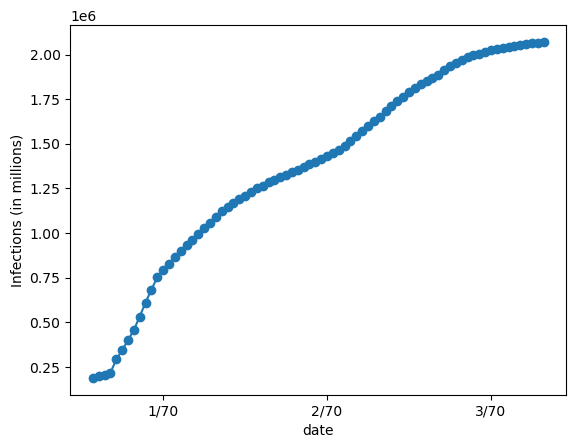

In [2]:
import numpy as np, pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# COVID NUMBERS
N = 1410000000/1e6  # US population in millions
df_full = pd.read_csv("covid_china_data_spring_2022_cumulative (1).csv")
df_full['confirmed_cases'] = df_full['confirmed_cases'] 
# df_full = df_full[(df_full['date'] <= '2021-03-17')&(df_full['date'] >= '2020-09-17')]
df_full.head()



plt.plot(df_full['date'], df_full['confirmed_cases'], 'o-')
plt.xlabel('date'); plt.ylabel('Infections (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.show()


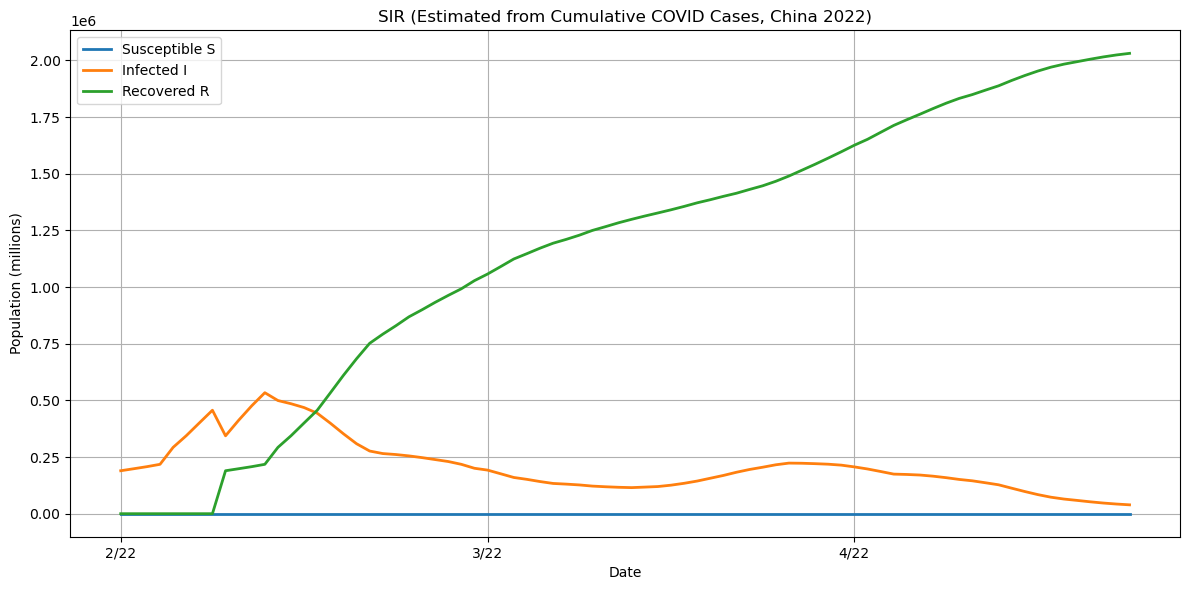

In [4]:
from main_functions import convert_cumulative_to_SIR

sir_df = convert_cumulative_to_SIR(
    df_full,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=N,              # your N = population in millions
    infectious_period=8,       # typical COVID infectious period
    new_case_col='new_cases',
    I_col='I',
    R_col='R',
    S_col='S'
)

plt.figure(figsize=(12,6))

plt.plot(sir_df['date'], sir_df['S'], label='Susceptible S', linewidth=2)
plt.plot(sir_df['date'], sir_df['I'], label='Infected I', linewidth=2)
plt.plot(sir_df['date'], sir_df['R'], label='Recovered R', linewidth=2)

plt.xlabel("Date")
plt.ylabel("Population (millions)")
plt.title("SIR (Estimated from Cumulative COVID Cases, China 2022)")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.grid(True)
plt.tight_layout()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [2]:
## PYTHON CODE TO BUILD AND FIT AN SIR MODEL GOES HERE. INTERSPERSE COMMENTS (IN MARKDOWN) TO EXPLAIN EACH STEP.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

### Progress Notes
- 11/18/2025: Started project, shared a GitHub page with each other, figured out and debugged inital in_class_COVID and main_functions python files given.
- 11/20/2025: Began filling out our Jupyter notebook in class as well as the code (Christy did most of the background and code, and Luke did the Dataset description and other miscelaneous areas).
- 11/22/2025: Finished up code and notes for first module check-in.

### Code Progress
All code progress and commit history is recorded on the team's shared GitHub page linked here: https://github.com/christylee1/Module4_covid


## QUESTIONS FOR YOUR TA: 

### First Module Check-in Questions
- There wasn't many online sources displaying updated prevalance and incidence rates for COVID in China and in general. Do you know any good sources for current COVID data in countries like China that we've missed, or should we stick to the prevalence and incidence background sources we have currently (which are quite outdated)?
- Are all our sections looking good? Is there any areas we need to add a bit more in?